Imports, functions

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

def J(omega,tau):
  return 2/5*tau/(1+(omega*tau)**2)

def T1(delta,sigmazzS,omegaI,omegaS,tau):
  return ((delta/4)**2*(1*J(omegaI-omegaS,tau)+3*J(omegaS,tau)+6*J(omegaI+omegaS,tau))+\
            3/4*(sigmazzS*omegaS)**2*J(omegaS,tau))**(-1)

def T1x(delta,omegaI,omegaS,tau):
  return ((delta/4)**2*(-1*J(omegaI-omegaS,tau)+6*J(omegaI+omegaS,tau)))**(-1)

def T1z(delta,sigmazzI,sigmazzS,omegaI,omegaS,tau):
    return ((delta/4)**2*(3*J(omegaI,tau)+3*J(omegaS,tau))+\
            3/4*(sigmazzS*omegaS)**2*J(omegaS,tau)+3/4*(sigmazzI*omegaI)**2*J(omegaI,tau))**(-1)

def T1y(delta,sigmazzS,omegaS,tau):
    return (3/4*delta*sigmazzS*omegaS*J(omegaS,tau))**(-1)

 Define constants

In [13]:
mu0 = 4*np.pi*1e-7                 # V s / A / m
mu04pi = 1e-7
hbar = 1.05457266e-34              # J s / rad
h = 2*np.pi*hbar                   # J s
gammaH = 26.7522128e7              # rad / s / T
gammaN = -2.7116e7                 # rad / s / T
rNH = 1.1*1e-10                    # m 
deltaHN = -2*mu04pi*gammaN*gammaH*hbar/rNH**3
omegaH = 14.1*gammaH
omegaN = 14.1*gammaN
tauc=1e-10


Calculate Solution with CSA and cross-correlated cross-relaxation

In [14]:
sigmazzH = 100e-6
sigmazzN = 100e-6

T1SS = T1(deltaHN,sigmazzN,omegaH,omegaN,tauc)
T1II = T1(deltaHN,sigmazzH,omegaN,omegaH,tauc)
T1IS = T1x(deltaHN,omegaN,omegaH,tauc)
T1ISIS = T1z(deltaHN, sigmazzH, sigmazzN, omegaH, omegaN, tauc)
T1ISI = T1y(deltaHN, sigmazzH, omegaH, tauc)
T1ISS = T1y(deltaHN, sigmazzN, omegaN, tauc)

R = np.array([[1/T1II ,  1/T1IS  , 1/T1ISI],
              [1/T1IS ,  1/T1SS  , 1/T1ISS],
              [1/T1ISI, 1/T1ISS , 1/T1ISIS]])
 
t = np.arange(0,15.01,.01)
Sz=np.zeros(len(t))
Iz=np.zeros(len(t));
IzSz = np.zeros(len(t));
for k,t0 in enumerate(t):  
    z = expm(-R*t0)@np.array([[0],[-2],[0]])-np.array([[gammaH/gammaN],[-1],[0]])
    Iz[k]=z[0]
    Sz[k]=z[1]
    IzSz[k]=z[2]

Plot results

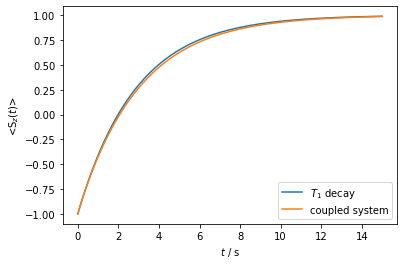

In [15]:
ax=plt.figure().add_subplot(111)
ax.plot(t,np.exp(-t/T1SS)*(-2)+1)
ax.plot(t,Sz)
ax.set_ylabel(r'<S$_z$($t$)>')
ax.set_xlabel(r'$t$ / s')
ax.legend([r'$T_1$ decay','coupled system'])

Calculate Solution with CSA and without cross-correlated cross-relaxation

In [22]:
sigmazz00 = 100e-6

T1SS = T1(deltaHN,sigmazz00,omegaH,omegaN,tauc)
T1II = T1(deltaHN,sigmazz00,omegaN,omegaH,tauc)
T1IS = T1x(deltaHN,omegaN,omegaH,tauc)
R = np.array([[1/T1II,1/T1IS],[1/T1IS,1/T1SS]])
t = np.arange(0,15.01,.01)
Sz2=np.zeros(len(t))
Iz=np.zeros(len(t))
for k,t0 in enumerate(t):  
    z = expm(-R*t0)@np.array([[0],[-2]])+np.array([[10],[1]]);
    Iz[k]=z[0];
    Sz2[k]=z[1];


Print the results

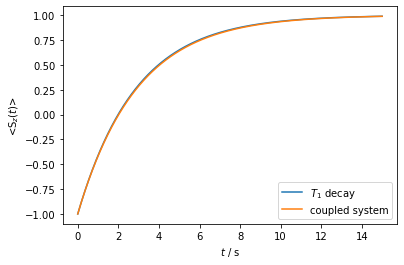

In [23]:
ax=plt.figure().add_subplot(111)
ax.plot(t,np.exp(-t/T1SS)*(-2)+1)
ax.plot(t,Sz2)
ax.set_ylabel(r'<S$_z$($t$)>')
ax.set_xlabel(r'$t$ / s')
ax.legend([r'$T_1$ decay','coupled system'])